In [1]:
%cd ../

/home/eli/AnacondaProjects/HTFATorch


In [2]:
import logging
import numpy as np
import htfa_torch.dtfa as DTFA
import htfa_torch.niidb as niidb
import htfa_torch.utils as utils

In [3]:
%matplotlib inline

In [4]:
logging.basicConfig(format='%(asctime)s %(message)s', datefmt='%m/%d/%Y %H:%M:%S',
                    level=logging.INFO)

In [5]:
synthetic_db = niidb.FMriActivationsDb('data/synthetic_data.db', mask='data/synthetic_data/nifti_files/wholebrain.nii.gz')

In [6]:
dtfa = DTFA.DeepTFA(synthetic_db.all(), mask='data/synthetic_data/wholebrain.nii.gz', num_factors=3, embedding_dim=2)

10/02/2019 14:22:37 Loading Nifti image data/synthetic_data/nifti_files/subject_10_task_1_stimulus_1.nii with mask data/synthetic_data/nifti_files/wholebrain.nii.gz (zscore=False, smooth=None)
10/02/2019 14:22:38 Loading Nifti image data/synthetic_data/nifti_files/subject_10_task_1_stimulus_10.nii with mask data/synthetic_data/nifti_files/wholebrain.nii.gz (zscore=False, smooth=None)
10/02/2019 14:22:38 Loading Nifti image data/synthetic_data/nifti_files/subject_10_task_1_stimulus_11.nii with mask data/synthetic_data/nifti_files/wholebrain.nii.gz (zscore=False, smooth=None)
10/02/2019 14:22:38 Loading Nifti image data/synthetic_data/nifti_files/subject_10_task_1_stimulus_12.nii with mask data/synthetic_data/nifti_files/wholebrain.nii.gz (zscore=False, smooth=None)
10/02/2019 14:22:38 Loading Nifti image data/synthetic_data/nifti_files/subject_10_task_1_stimulus_13.nii with mask data/synthetic_data/nifti_files/wholebrain.nii.gz (zscore=False, smooth=None)
10/02/2019 14:22:38 Loading Nif

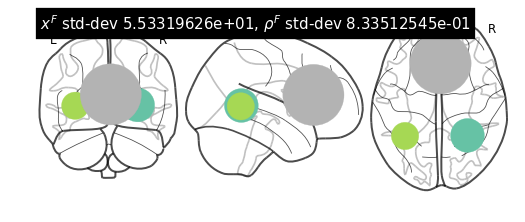

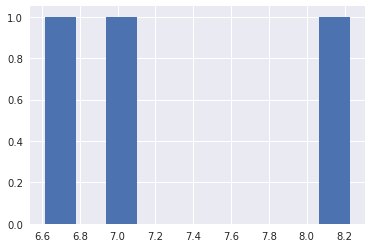

(<nilearn.plotting.displays.OrthoProjector at 0x7fe2d42891d0>,
 tensor([[ 30.8785, -49.2311,   4.8640],
         [-34.7999, -49.8066,   4.0001],
         [  2.5793,  26.6087,  15.9568]]),
 tensor([7.0450, 6.6181, 8.2271]))

In [7]:
dtfa.visualize_factor_embedding()

In [8]:
losses = dtfa.train(num_steps=1000, learning_rate={'q': 1e-1, 'p': 1e-2}, log_level=logging.INFO, num_particles=1,
                    batch_size=300, use_cuda=True, blocks_batch_size=20, patience=50, checkpoint_steps=200,
                    blocks_filter=synthetic_db.inference_filter(training=True))

10/02/2019 14:24:42 [Epoch 1] (11522ms) Posterior free-energy 2.23827632e+08 = KL from prior 2.29077402e+04 - log-likelihood -2.23804768e+08
10/02/2019 14:24:42 Saving checkpoint...
10/02/2019 14:24:53 [Epoch 2] (11394ms) Posterior free-energy 2.08735344e+08 = KL from prior 1.33820490e+07 - log-likelihood -1.95353264e+08
10/02/2019 14:25:05 [Epoch 3] (11300ms) Posterior free-energy 1.91484352e+08 = KL from prior 3.41193125e+04 - log-likelihood -1.91450240e+08
10/02/2019 14:25:16 [Epoch 4] (11335ms) Posterior free-energy 1.90061344e+08 = KL from prior 3.47796133e+04 - log-likelihood -1.90026544e+08
10/02/2019 14:25:27 [Epoch 5] (11262ms) Posterior free-energy 1.89400048e+08 = KL from prior 3.55019375e+04 - log-likelihood -1.89364560e+08
10/02/2019 14:25:39 [Epoch 6] (11218ms) Posterior free-energy 1.89078640e+08 = KL from prior 3.53589648e+04 - log-likelihood -1.89043312e+08
10/02/2019 14:25:50 [Epoch 7] (11244ms) Posterior free-energy 1.88877632e+08 = KL from prior 3.61438398e+04 - log

Epoch   170: reducing learning rate of group 0 to 5.0000e-02.
Epoch   170: reducing learning rate of group 1 to 5.0000e-03.
Epoch   170: reducing learning rate of group 2 to 5.0000e-02.
Epoch   170: reducing learning rate of group 3 to 5.0000e-03.


10/02/2019 14:57:45 [Epoch 172] (11334ms) Posterior free-energy 1.87407104e+08 = KL from prior 4.45993008e+04 - log-likelihood -1.87362544e+08
10/02/2019 14:57:56 [Epoch 173] (11321ms) Posterior free-energy 1.87402240e+08 = KL from prior 4.19461445e+04 - log-likelihood -1.87360288e+08
10/02/2019 14:58:07 [Epoch 174] (11471ms) Posterior free-energy 1.87402272e+08 = KL from prior 4.14582695e+04 - log-likelihood -1.87360832e+08
10/02/2019 14:58:19 [Epoch 175] (11411ms) Posterior free-energy 1.87401520e+08 = KL from prior 4.12174297e+04 - log-likelihood -1.87360352e+08
10/02/2019 14:58:30 [Epoch 176] (11385ms) Posterior free-energy 1.87401376e+08 = KL from prior 4.07955742e+04 - log-likelihood -1.87360528e+08
10/02/2019 14:58:42 [Epoch 177] (11226ms) Posterior free-energy 1.87401456e+08 = KL from prior 4.15811641e+04 - log-likelihood -1.87359856e+08
10/02/2019 14:58:53 [Epoch 178] (11274ms) Posterior free-energy 1.87401936e+08 = KL from prior 4.17803789e+04 - log-likelihood -1.87360144e+08

Epoch   232: reducing learning rate of group 0 to 2.5000e-02.
Epoch   232: reducing learning rate of group 1 to 2.5000e-03.
Epoch   232: reducing learning rate of group 2 to 2.5000e-02.
Epoch   232: reducing learning rate of group 3 to 2.5000e-03.


10/02/2019 15:09:32 [Epoch 234] (11391ms) Posterior free-energy 1.87395248e+08 = KL from prior 3.84308398e+04 - log-likelihood -1.87356832e+08
10/02/2019 15:09:43 [Epoch 235] (11320ms) Posterior free-energy 1.87394496e+08 = KL from prior 3.78879141e+04 - log-likelihood -1.87356544e+08
10/02/2019 15:09:55 [Epoch 236] (11457ms) Posterior free-energy 1.87393968e+08 = KL from prior 3.79011758e+04 - log-likelihood -1.87356128e+08
10/02/2019 15:10:06 [Epoch 237] (11447ms) Posterior free-energy 1.87394304e+08 = KL from prior 3.75557891e+04 - log-likelihood -1.87356752e+08
10/02/2019 15:10:17 [Epoch 238] (11269ms) Posterior free-energy 1.87394032e+08 = KL from prior 3.77431133e+04 - log-likelihood -1.87356304e+08
10/02/2019 15:10:29 [Epoch 239] (11342ms) Posterior free-energy 1.87394928e+08 = KL from prior 3.78982422e+04 - log-likelihood -1.87357040e+08
10/02/2019 15:10:40 [Epoch 240] (11287ms) Posterior free-energy 1.87393696e+08 = KL from prior 3.72410391e+04 - log-likelihood -1.87356512e+08

Epoch   283: reducing learning rate of group 0 to 1.2500e-02.
Epoch   283: reducing learning rate of group 1 to 1.2500e-03.
Epoch   283: reducing learning rate of group 2 to 1.2500e-02.
Epoch   283: reducing learning rate of group 3 to 1.2500e-03.


10/02/2019 15:19:12 [Epoch 285] (11342ms) Posterior free-energy 1.87390736e+08 = KL from prior 3.60603438e+04 - log-likelihood -1.87354720e+08
10/02/2019 15:19:23 [Epoch 286] (11447ms) Posterior free-energy 1.87390560e+08 = KL from prior 3.51699023e+04 - log-likelihood -1.87355360e+08
10/02/2019 15:19:35 [Epoch 287] (11404ms) Posterior free-energy 1.87390416e+08 = KL from prior 3.57500430e+04 - log-likelihood -1.87354720e+08
10/02/2019 15:19:46 [Epoch 288] (11362ms) Posterior free-energy 1.87390832e+08 = KL from prior 3.56121562e+04 - log-likelihood -1.87355184e+08
10/02/2019 15:19:58 [Epoch 289] (11441ms) Posterior free-energy 1.87390384e+08 = KL from prior 3.52812422e+04 - log-likelihood -1.87355152e+08
10/02/2019 15:20:09 [Epoch 290] (11472ms) Posterior free-energy 1.87390592e+08 = KL from prior 3.56537227e+04 - log-likelihood -1.87354992e+08
10/02/2019 15:20:21 [Epoch 291] (11407ms) Posterior free-energy 1.87390336e+08 = KL from prior 3.55242109e+04 - log-likelihood -1.87354784e+08

Epoch   334: reducing learning rate of group 0 to 6.2500e-03.
Epoch   334: reducing learning rate of group 1 to 6.2500e-04.
Epoch   334: reducing learning rate of group 2 to 6.2500e-03.
Epoch   334: reducing learning rate of group 3 to 6.2500e-04.


10/02/2019 15:28:53 [Epoch 336] (11424ms) Posterior free-energy 1.87389616e+08 = KL from prior 3.53222500e+04 - log-likelihood -1.87354352e+08
10/02/2019 15:29:05 [Epoch 337] (11439ms) Posterior free-energy 1.87389984e+08 = KL from prior 3.59254648e+04 - log-likelihood -1.87354032e+08
10/02/2019 15:29:16 [Epoch 338] (11246ms) Posterior free-energy 1.87389600e+08 = KL from prior 3.50848008e+04 - log-likelihood -1.87354528e+08
10/02/2019 15:29:27 [Epoch 339] (11308ms) Posterior free-energy 1.87389616e+08 = KL from prior 3.48393984e+04 - log-likelihood -1.87354784e+08
10/02/2019 15:29:39 [Epoch 340] (11315ms) Posterior free-energy 1.87388688e+08 = KL from prior 3.48075273e+04 - log-likelihood -1.87353904e+08
10/02/2019 15:29:50 [Epoch 341] (11286ms) Posterior free-energy 1.87389152e+08 = KL from prior 3.51018008e+04 - log-likelihood -1.87354048e+08
10/02/2019 15:30:01 [Epoch 342] (11289ms) Posterior free-energy 1.87389360e+08 = KL from prior 3.53015977e+04 - log-likelihood -1.87354048e+08

Epoch   385: reducing learning rate of group 0 to 3.1250e-03.
Epoch   385: reducing learning rate of group 1 to 3.1250e-04.
Epoch   385: reducing learning rate of group 2 to 3.1250e-03.
Epoch   385: reducing learning rate of group 3 to 3.1250e-04.


10/02/2019 15:38:34 [Epoch 387] (11413ms) Posterior free-energy 1.87388128e+08 = KL from prior 3.43329766e+04 - log-likelihood -1.87353776e+08
10/02/2019 15:38:46 [Epoch 388] (11461ms) Posterior free-energy 1.87388400e+08 = KL from prior 3.46931484e+04 - log-likelihood -1.87353680e+08
10/02/2019 15:38:57 [Epoch 389] (11271ms) Posterior free-energy 1.87388112e+08 = KL from prior 3.44153359e+04 - log-likelihood -1.87353696e+08
10/02/2019 15:39:09 [Epoch 390] (11434ms) Posterior free-energy 1.87388448e+08 = KL from prior 3.46189609e+04 - log-likelihood -1.87353824e+08
10/02/2019 15:39:20 [Epoch 391] (11304ms) Posterior free-energy 1.87388112e+08 = KL from prior 3.43814180e+04 - log-likelihood -1.87353664e+08
10/02/2019 15:39:31 [Epoch 392] (11427ms) Posterior free-energy 1.87387920e+08 = KL from prior 3.46272734e+04 - log-likelihood -1.87353248e+08
10/02/2019 15:39:43 [Epoch 393] (11225ms) Posterior free-energy 1.87388608e+08 = KL from prior 3.45651758e+04 - log-likelihood -1.87354048e+08

Epoch   436: reducing learning rate of group 0 to 1.5625e-03.
Epoch   436: reducing learning rate of group 1 to 1.5625e-04.
Epoch   436: reducing learning rate of group 2 to 1.5625e-03.
Epoch   436: reducing learning rate of group 3 to 1.5625e-04.


10/02/2019 15:48:15 [Epoch 438] (11438ms) Posterior free-energy 1.87388000e+08 = KL from prior 3.43421484e+04 - log-likelihood -1.87353616e+08
10/02/2019 15:48:27 [Epoch 439] (11488ms) Posterior free-energy 1.87387936e+08 = KL from prior 3.42438984e+04 - log-likelihood -1.87353728e+08
10/02/2019 15:48:38 [Epoch 440] (11398ms) Posterior free-energy 1.87387936e+08 = KL from prior 3.41370703e+04 - log-likelihood -1.87353824e+08
10/02/2019 15:48:49 [Epoch 441] (11220ms) Posterior free-energy 1.87387696e+08 = KL from prior 3.41810312e+04 - log-likelihood -1.87353520e+08
10/02/2019 15:49:00 [Epoch 442] (11182ms) Posterior free-energy 1.87387968e+08 = KL from prior 3.44321523e+04 - log-likelihood -1.87353520e+08
10/02/2019 15:49:12 [Epoch 443] (11365ms) Posterior free-energy 1.87388448e+08 = KL from prior 3.50342578e+04 - log-likelihood -1.87353376e+08
10/02/2019 15:49:23 [Epoch 444] (11365ms) Posterior free-energy 1.87388272e+08 = KL from prior 3.43418438e+04 - log-likelihood -1.87353888e+08

Epoch   487: reducing learning rate of group 0 to 7.8125e-04.
Epoch   487: reducing learning rate of group 1 to 7.8125e-05.
Epoch   487: reducing learning rate of group 2 to 7.8125e-04.
Epoch   487: reducing learning rate of group 3 to 7.8125e-05.


10/02/2019 15:57:57 [Epoch 489] (11440ms) Posterior free-energy 1.87387936e+08 = KL from prior 3.46541562e+04 - log-likelihood -1.87353328e+08
10/02/2019 15:58:08 [Epoch 490] (11344ms) Posterior free-energy 1.87388208e+08 = KL from prior 3.42710469e+04 - log-likelihood -1.87353920e+08
10/02/2019 15:58:20 [Epoch 491] (11434ms) Posterior free-energy 1.87388240e+08 = KL from prior 3.42488438e+04 - log-likelihood -1.87354016e+08
10/02/2019 15:58:31 [Epoch 492] (11475ms) Posterior free-energy 1.87388080e+08 = KL from prior 3.42263633e+04 - log-likelihood -1.87353856e+08
10/02/2019 15:58:43 [Epoch 493] (11472ms) Posterior free-energy 1.87387808e+08 = KL from prior 3.41800156e+04 - log-likelihood -1.87353632e+08
10/02/2019 15:58:54 [Epoch 494] (11430ms) Posterior free-energy 1.87387744e+08 = KL from prior 3.45832656e+04 - log-likelihood -1.87353136e+08
10/02/2019 15:59:06 [Epoch 495] (11341ms) Posterior free-energy 1.87387392e+08 = KL from prior 3.41641094e+04 - log-likelihood -1.87353216e+08

Epoch   538: reducing learning rate of group 0 to 3.9063e-04.
Epoch   538: reducing learning rate of group 1 to 3.9063e-05.
Epoch   538: reducing learning rate of group 2 to 3.9063e-04.
Epoch   538: reducing learning rate of group 3 to 3.9063e-05.


10/02/2019 16:07:46 [Epoch 540] (11587ms) Posterior free-energy 1.87387776e+08 = KL from prior 3.42228203e+04 - log-likelihood -1.87353584e+08
10/02/2019 16:07:57 [Epoch 541] (11509ms) Posterior free-energy 1.87387968e+08 = KL from prior 3.41373633e+04 - log-likelihood -1.87353792e+08
10/02/2019 16:08:09 [Epoch 542] (11544ms) Posterior free-energy 1.87387984e+08 = KL from prior 3.40855625e+04 - log-likelihood -1.87353920e+08
10/02/2019 16:08:21 [Epoch 543] (11711ms) Posterior free-energy 1.87387760e+08 = KL from prior 3.43374492e+04 - log-likelihood -1.87353424e+08
10/02/2019 16:08:32 [Epoch 544] (11679ms) Posterior free-energy 1.87387520e+08 = KL from prior 3.40302148e+04 - log-likelihood -1.87353504e+08
10/02/2019 16:08:44 [Epoch 545] (11876ms) Posterior free-energy 1.87387776e+08 = KL from prior 3.41280703e+04 - log-likelihood -1.87353616e+08
10/02/2019 16:08:55 [Epoch 546] (11111ms) Posterior free-energy 1.87387888e+08 = KL from prior 3.40537344e+04 - log-likelihood -1.87353824e+08

Epoch   589: reducing learning rate of group 0 to 1.9531e-04.
Epoch   589: reducing learning rate of group 1 to 1.9531e-05.
Epoch   589: reducing learning rate of group 2 to 1.9531e-04.
Epoch   589: reducing learning rate of group 3 to 1.9531e-05.


10/02/2019 16:17:35 [Epoch 591] (11421ms) Posterior free-energy 1.87387728e+08 = KL from prior 3.42108125e+04 - log-likelihood -1.87353520e+08
10/02/2019 16:17:47 [Epoch 592] (11862ms) Posterior free-energy 1.87387488e+08 = KL from prior 3.40939727e+04 - log-likelihood -1.87353424e+08
10/02/2019 16:17:59 [Epoch 593] (11774ms) Posterior free-energy 1.87387888e+08 = KL from prior 3.44461172e+04 - log-likelihood -1.87353440e+08
10/02/2019 16:18:10 [Epoch 594] (11378ms) Posterior free-energy 1.87387552e+08 = KL from prior 3.41922930e+04 - log-likelihood -1.87353344e+08
10/02/2019 16:18:22 [Epoch 595] (11703ms) Posterior free-energy 1.87388176e+08 = KL from prior 3.45056680e+04 - log-likelihood -1.87353712e+08
10/02/2019 16:18:34 [Epoch 596] (11655ms) Posterior free-energy 1.87387888e+08 = KL from prior 3.43356250e+04 - log-likelihood -1.87353504e+08
10/02/2019 16:18:46 [Epoch 597] (11793ms) Posterior free-energy 1.87387456e+08 = KL from prior 3.43959258e+04 - log-likelihood -1.87353056e+08

Epoch   640: reducing learning rate of group 0 to 9.7656e-05.
Epoch   640: reducing learning rate of group 1 to 1.0000e-05.
Epoch   640: reducing learning rate of group 2 to 9.7656e-05.
Epoch   640: reducing learning rate of group 3 to 1.0000e-05.


10/02/2019 16:27:32 [Epoch 642] (11555ms) Posterior free-energy 1.87387888e+08 = KL from prior 3.42055156e+04 - log-likelihood -1.87353728e+08
10/02/2019 16:27:43 [Epoch 643] (11482ms) Posterior free-energy 1.87387952e+08 = KL from prior 3.44566094e+04 - log-likelihood -1.87353456e+08
10/02/2019 16:27:55 [Epoch 644] (11707ms) Posterior free-energy 1.87387504e+08 = KL from prior 3.42065469e+04 - log-likelihood -1.87353296e+08
10/02/2019 16:28:06 [Epoch 645] (11375ms) Posterior free-energy 1.87387616e+08 = KL from prior 3.44719023e+04 - log-likelihood -1.87353184e+08
10/02/2019 16:28:18 [Epoch 646] (11338ms) Posterior free-energy 1.87387712e+08 = KL from prior 3.39970078e+04 - log-likelihood -1.87353744e+08
10/02/2019 16:28:29 [Epoch 647] (11461ms) Posterior free-energy 1.87387696e+08 = KL from prior 3.42500039e+04 - log-likelihood -1.87353424e+08
10/02/2019 16:28:41 [Epoch 648] (11514ms) Posterior free-energy 1.87387888e+08 = KL from prior 3.39699102e+04 - log-likelihood -1.87353952e+08

Epoch   691: reducing learning rate of group 0 to 4.8828e-05.
Epoch   691: reducing learning rate of group 2 to 4.8828e-05.


10/02/2019 16:37:20 [Epoch 693] (11663ms) Posterior free-energy 1.87388144e+08 = KL from prior 3.46336875e+04 - log-likelihood -1.87353584e+08
10/02/2019 16:37:31 [Epoch 694] (11666ms) Posterior free-energy 1.87387952e+08 = KL from prior 3.44021719e+04 - log-likelihood -1.87353568e+08
10/02/2019 16:37:43 [Epoch 695] (11600ms) Posterior free-energy 1.87387296e+08 = KL from prior 3.40255000e+04 - log-likelihood -1.87353296e+08
10/02/2019 16:37:55 [Epoch 696] (11507ms) Posterior free-energy 1.87387200e+08 = KL from prior 3.37052422e+04 - log-likelihood -1.87353536e+08
10/02/2019 16:38:06 [Epoch 697] (11354ms) Posterior free-energy 1.87387648e+08 = KL from prior 3.39040742e+04 - log-likelihood -1.87353776e+08
10/02/2019 16:38:18 [Epoch 698] (11542ms) Posterior free-energy 1.87387520e+08 = KL from prior 3.41792891e+04 - log-likelihood -1.87353360e+08
10/02/2019 16:38:29 [Epoch 699] (11305ms) Posterior free-energy 1.87387504e+08 = KL from prior 3.42631797e+04 - log-likelihood -1.87353248e+08

Epoch   742: reducing learning rate of group 0 to 2.4414e-05.
Epoch   742: reducing learning rate of group 2 to 2.4414e-05.


10/02/2019 16:46:55 [Epoch 744] (11118ms) Posterior free-energy 1.87387792e+08 = KL from prior 3.41772812e+04 - log-likelihood -1.87353600e+08
10/02/2019 16:47:07 [Epoch 745] (11252ms) Posterior free-energy 1.87387552e+08 = KL from prior 3.41013555e+04 - log-likelihood -1.87353456e+08
10/02/2019 16:47:18 [Epoch 746] (11130ms) Posterior free-energy 1.87387264e+08 = KL from prior 3.42259102e+04 - log-likelihood -1.87353104e+08
10/02/2019 16:47:29 [Epoch 747] (10976ms) Posterior free-energy 1.87388096e+08 = KL from prior 3.41824688e+04 - log-likelihood -1.87353952e+08
10/02/2019 16:47:40 [Epoch 748] (11036ms) Posterior free-energy 1.87387664e+08 = KL from prior 3.44680039e+04 - log-likelihood -1.87353232e+08
10/02/2019 16:47:51 [Epoch 749] (11004ms) Posterior free-energy 1.87388704e+08 = KL from prior 3.51996211e+04 - log-likelihood -1.87353504e+08
10/02/2019 16:48:02 [Epoch 750] (10997ms) Posterior free-energy 1.87387424e+08 = KL from prior 3.42112500e+04 - log-likelihood -1.87353200e+08

Epoch   793: reducing learning rate of group 0 to 1.2207e-05.
Epoch   793: reducing learning rate of group 2 to 1.2207e-05.


10/02/2019 16:56:22 [Epoch 795] (11160ms) Posterior free-energy 1.87387904e+08 = KL from prior 3.42284492e+04 - log-likelihood -1.87353616e+08
10/02/2019 16:56:33 [Epoch 796] (11176ms) Posterior free-energy 1.87387728e+08 = KL from prior 3.44269102e+04 - log-likelihood -1.87353296e+08
10/02/2019 16:56:44 [Epoch 797] (11019ms) Posterior free-energy 1.87387504e+08 = KL from prior 3.44962266e+04 - log-likelihood -1.87352976e+08
10/02/2019 16:56:55 [Epoch 798] (11113ms) Posterior free-energy 1.87387344e+08 = KL from prior 3.37148516e+04 - log-likelihood -1.87353616e+08
10/02/2019 16:57:06 [Epoch 799] (11122ms) Posterior free-energy 1.87387312e+08 = KL from prior 3.36720742e+04 - log-likelihood -1.87353648e+08
10/02/2019 16:57:17 [Epoch 800] (11049ms) Posterior free-energy 1.87387440e+08 = KL from prior 3.40899258e+04 - log-likelihood -1.87353344e+08
10/02/2019 16:57:28 [Epoch 801] (11040ms) Posterior free-energy 1.87387952e+08 = KL from prior 3.43025156e+04 - log-likelihood -1.87353664e+08

Epoch   844: reducing learning rate of group 0 to 1.0000e-05.
Epoch   844: reducing learning rate of group 2 to 1.0000e-05.


10/02/2019 17:05:48 [Epoch 846] (11100ms) Posterior free-energy 1.87387744e+08 = KL from prior 3.41243242e+04 - log-likelihood -1.87353600e+08
10/02/2019 17:05:59 [Epoch 847] (11123ms) Posterior free-energy 1.87387520e+08 = KL from prior 3.42562656e+04 - log-likelihood -1.87353312e+08
10/02/2019 17:06:11 [Epoch 848] (11063ms) Posterior free-energy 1.87387488e+08 = KL from prior 3.43047773e+04 - log-likelihood -1.87353152e+08
10/02/2019 17:06:22 [Epoch 849] (11131ms) Posterior free-energy 1.87387744e+08 = KL from prior 3.45883359e+04 - log-likelihood -1.87353168e+08
10/02/2019 17:06:33 [Epoch 850] (11164ms) Posterior free-energy 1.87387728e+08 = KL from prior 3.41514141e+04 - log-likelihood -1.87353568e+08
10/02/2019 17:06:44 [Epoch 851] (11226ms) Posterior free-energy 1.87387920e+08 = KL from prior 3.42674219e+04 - log-likelihood -1.87353632e+08
10/02/2019 17:06:55 [Epoch 852] (11086ms) Posterior free-energy 1.87387504e+08 = KL from prior 3.40011641e+04 - log-likelihood -1.87353520e+08

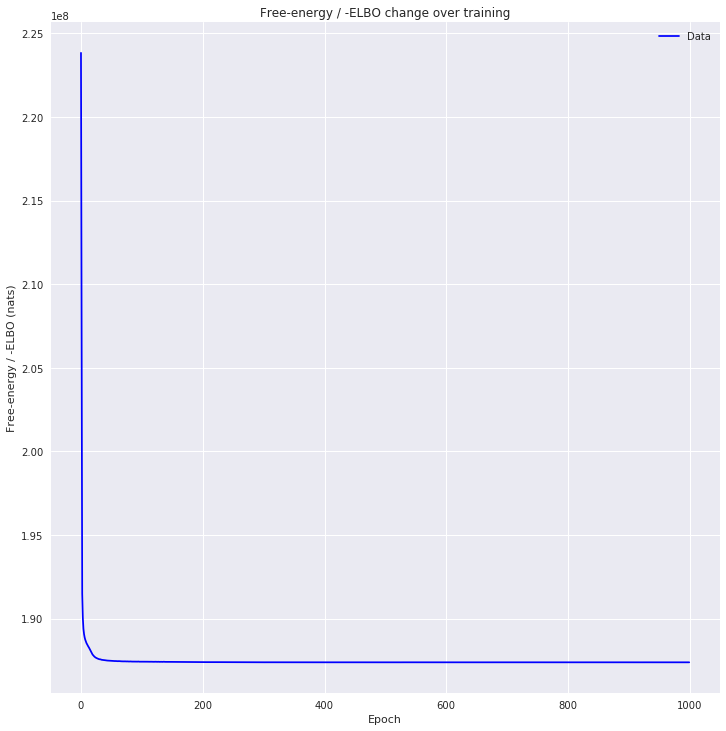

In [9]:
utils.plot_losses(losses)

In [10]:
losses = dtfa.train(num_steps=1000, learning_rate={'q': 1e-1, 'p': 1e-2}, log_level=logging.INFO, num_particles=1,
                    batch_size=300, use_cuda=True, blocks_batch_size=20, patience=50, checkpoint_steps=200,
                    train_globals=False, blocks_filter=synthetic_db.inference_filter(training=False))

10/02/2019 17:34:25 [Epoch 1] (271ms) Posterior free-energy 4.73949650e+06 = KL from prior 2.65835234e+04 - log-likelihood -4.71291300e+06
10/02/2019 17:34:25 Saving checkpoint...
10/02/2019 17:34:26 [Epoch 2] (269ms) Posterior free-energy 4.72616700e+06 = KL from prior 2.06827754e+04 - log-likelihood -4.70548400e+06
10/02/2019 17:34:26 [Epoch 3] (266ms) Posterior free-energy 4.72836200e+06 = KL from prior 2.17709727e+04 - log-likelihood -4.70659100e+06
10/02/2019 17:34:26 [Epoch 4] (263ms) Posterior free-energy 4.71774400e+06 = KL from prior 1.70935645e+04 - log-likelihood -4.70065000e+06
10/02/2019 17:34:27 [Epoch 5] (267ms) Posterior free-energy 4.71482000e+06 = KL from prior 1.54059912e+04 - log-likelihood -4.69941400e+06
10/02/2019 17:34:27 [Epoch 6] (265ms) Posterior free-energy 4.71198750e+06 = KL from prior 1.42987598e+04 - log-likelihood -4.69768850e+06
10/02/2019 17:34:27 [Epoch 7] (266ms) Posterior free-energy 4.70736750e+06 = KL from prior 1.21577725e+04 - log-likelihood -4

Epoch   129: reducing learning rate of group 0 to 5.0000e-02.
Epoch   129: reducing learning rate of group 1 to 5.0000e-03.


10/02/2019 17:35:00 [Epoch 131] (261ms) Posterior free-energy 4.68057600e+06 = KL from prior 9.34553955e+02 - log-likelihood -4.67964150e+06
10/02/2019 17:35:00 [Epoch 132] (263ms) Posterior free-energy 4.68062350e+06 = KL from prior 9.65587524e+02 - log-likelihood -4.67965800e+06
10/02/2019 17:35:01 [Epoch 133] (282ms) Posterior free-energy 4.68064400e+06 = KL from prior 9.83996704e+02 - log-likelihood -4.67966000e+06
10/02/2019 17:35:01 [Epoch 134] (264ms) Posterior free-energy 4.68053800e+06 = KL from prior 9.47978271e+02 - log-likelihood -4.67959000e+06
10/02/2019 17:35:01 [Epoch 135] (262ms) Posterior free-energy 4.68057150e+06 = KL from prior 9.25239624e+02 - log-likelihood -4.67964600e+06
10/02/2019 17:35:01 [Epoch 136] (263ms) Posterior free-energy 4.68049100e+06 = KL from prior 9.50934692e+02 - log-likelihood -4.67954000e+06
10/02/2019 17:35:02 [Epoch 137] (265ms) Posterior free-energy 4.68054200e+06 = KL from prior 9.21295288e+02 - log-likelihood -4.67962100e+06
10/02/2019 17

Epoch   180: reducing learning rate of group 0 to 2.5000e-02.
Epoch   180: reducing learning rate of group 1 to 2.5000e-03.


10/02/2019 17:35:14 [Epoch 182] (266ms) Posterior free-energy 4.68049150e+06 = KL from prior 8.70411133e+02 - log-likelihood -4.67962100e+06
10/02/2019 17:35:14 [Epoch 183] (264ms) Posterior free-energy 4.68043150e+06 = KL from prior 9.01489380e+02 - log-likelihood -4.67953000e+06
10/02/2019 17:35:14 [Epoch 184] (266ms) Posterior free-energy 4.68045400e+06 = KL from prior 9.17924988e+02 - log-likelihood -4.67953600e+06
10/02/2019 17:35:14 [Epoch 185] (267ms) Posterior free-energy 4.68043100e+06 = KL from prior 8.69034851e+02 - log-likelihood -4.67956200e+06
10/02/2019 17:35:15 [Epoch 186] (268ms) Posterior free-energy 4.68042100e+06 = KL from prior 9.03268005e+02 - log-likelihood -4.67951750e+06
10/02/2019 17:35:15 [Epoch 187] (269ms) Posterior free-energy 4.68047850e+06 = KL from prior 8.96682007e+02 - log-likelihood -4.67958200e+06
10/02/2019 17:35:15 [Epoch 188] (265ms) Posterior free-energy 4.68045500e+06 = KL from prior 8.64479858e+02 - log-likelihood -4.67959050e+06
10/02/2019 17

Epoch   231: reducing learning rate of group 0 to 1.2500e-02.
Epoch   231: reducing learning rate of group 1 to 1.2500e-03.


10/02/2019 17:35:27 [Epoch 233] (264ms) Posterior free-energy 4.68036200e+06 = KL from prior 8.59369690e+02 - log-likelihood -4.67950300e+06
10/02/2019 17:35:27 [Epoch 234] (265ms) Posterior free-energy 4.68043700e+06 = KL from prior 8.98894470e+02 - log-likelihood -4.67953800e+06
10/02/2019 17:35:28 [Epoch 235] (273ms) Posterior free-energy 4.68042350e+06 = KL from prior 8.84792847e+02 - log-likelihood -4.67953900e+06
10/02/2019 17:35:28 [Epoch 236] (268ms) Posterior free-energy 4.68036950e+06 = KL from prior 8.69051086e+02 - log-likelihood -4.67950050e+06
10/02/2019 17:35:28 [Epoch 237] (270ms) Posterior free-energy 4.68039400e+06 = KL from prior 9.07540771e+02 - log-likelihood -4.67948650e+06
10/02/2019 17:35:29 [Epoch 238] (266ms) Posterior free-energy 4.68041050e+06 = KL from prior 8.65026306e+02 - log-likelihood -4.67954500e+06
10/02/2019 17:35:29 [Epoch 239] (268ms) Posterior free-energy 4.68040400e+06 = KL from prior 8.33661987e+02 - log-likelihood -4.67957050e+06
10/02/2019 17

Epoch   282: reducing learning rate of group 0 to 6.2500e-03.
Epoch   282: reducing learning rate of group 1 to 6.2500e-04.


10/02/2019 17:35:41 [Epoch 284] (262ms) Posterior free-energy 4.68040800e+06 = KL from prior 8.98661499e+02 - log-likelihood -4.67950900e+06
10/02/2019 17:35:41 [Epoch 285] (261ms) Posterior free-energy 4.68040600e+06 = KL from prior 8.67750305e+02 - log-likelihood -4.67953800e+06
10/02/2019 17:35:41 [Epoch 286] (262ms) Posterior free-energy 4.68036850e+06 = KL from prior 8.41512268e+02 - log-likelihood -4.67952700e+06
10/02/2019 17:35:42 [Epoch 287] (260ms) Posterior free-energy 4.68035850e+06 = KL from prior 8.28715454e+02 - log-likelihood -4.67953000e+06
10/02/2019 17:35:42 [Epoch 288] (261ms) Posterior free-energy 4.68040700e+06 = KL from prior 8.29436401e+02 - log-likelihood -4.67957750e+06
10/02/2019 17:35:42 [Epoch 289] (262ms) Posterior free-energy 4.68037450e+06 = KL from prior 8.85865417e+02 - log-likelihood -4.67948850e+06
10/02/2019 17:35:42 [Epoch 290] (260ms) Posterior free-energy 4.68043850e+06 = KL from prior 8.66926025e+02 - log-likelihood -4.67957200e+06
10/02/2019 17

Epoch   333: reducing learning rate of group 0 to 3.1250e-03.
Epoch   333: reducing learning rate of group 1 to 3.1250e-04.


10/02/2019 17:35:54 [Epoch 335] (265ms) Posterior free-energy 4.68037200e+06 = KL from prior 8.95789062e+02 - log-likelihood -4.67947600e+06
10/02/2019 17:35:55 [Epoch 336] (263ms) Posterior free-energy 4.68035300e+06 = KL from prior 8.50278931e+02 - log-likelihood -4.67950250e+06
10/02/2019 17:35:55 [Epoch 337] (263ms) Posterior free-energy 4.68039400e+06 = KL from prior 8.57238831e+02 - log-likelihood -4.67953700e+06
10/02/2019 17:35:55 [Epoch 338] (272ms) Posterior free-energy 4.68041300e+06 = KL from prior 8.55301331e+02 - log-likelihood -4.67955750e+06
10/02/2019 17:35:55 [Epoch 339] (262ms) Posterior free-energy 4.68035700e+06 = KL from prior 8.26368042e+02 - log-likelihood -4.67953050e+06
10/02/2019 17:35:56 [Epoch 340] (262ms) Posterior free-energy 4.68033100e+06 = KL from prior 8.41949219e+02 - log-likelihood -4.67948900e+06
10/02/2019 17:35:56 [Epoch 341] (264ms) Posterior free-energy 4.68035050e+06 = KL from prior 8.69950745e+02 - log-likelihood -4.67948050e+06
10/02/2019 17

Epoch   384: reducing learning rate of group 0 to 1.5625e-03.
Epoch   384: reducing learning rate of group 1 to 1.5625e-04.


10/02/2019 17:36:08 [Epoch 386] (267ms) Posterior free-energy 4.68035150e+06 = KL from prior 8.39216309e+02 - log-likelihood -4.67951250e+06
10/02/2019 17:36:08 [Epoch 387] (267ms) Posterior free-energy 4.68032500e+06 = KL from prior 8.52027710e+02 - log-likelihood -4.67947350e+06
10/02/2019 17:36:08 [Epoch 388] (267ms) Posterior free-energy 4.68040000e+06 = KL from prior 8.87310059e+02 - log-likelihood -4.67951250e+06
10/02/2019 17:36:09 [Epoch 389] (265ms) Posterior free-energy 4.68035150e+06 = KL from prior 8.35970642e+02 - log-likelihood -4.67951600e+06
10/02/2019 17:36:09 [Epoch 390] (267ms) Posterior free-energy 4.68037250e+06 = KL from prior 8.58225098e+02 - log-likelihood -4.67951450e+06
10/02/2019 17:36:09 [Epoch 391] (269ms) Posterior free-energy 4.68033900e+06 = KL from prior 8.49107910e+02 - log-likelihood -4.67949000e+06
10/02/2019 17:36:09 [Epoch 392] (268ms) Posterior free-energy 4.68039450e+06 = KL from prior 8.47802368e+02 - log-likelihood -4.67954700e+06
10/02/2019 17

Epoch   435: reducing learning rate of group 0 to 7.8125e-04.
Epoch   435: reducing learning rate of group 1 to 7.8125e-05.


10/02/2019 17:36:21 [Epoch 437] (268ms) Posterior free-energy 4.68042500e+06 = KL from prior 8.76296631e+02 - log-likelihood -4.67954900e+06
10/02/2019 17:36:22 [Epoch 438] (268ms) Posterior free-energy 4.68036950e+06 = KL from prior 8.80271118e+02 - log-likelihood -4.67948900e+06
10/02/2019 17:36:22 [Epoch 439] (269ms) Posterior free-energy 4.68033700e+06 = KL from prior 8.53855652e+02 - log-likelihood -4.67948300e+06
10/02/2019 17:36:22 [Epoch 440] (268ms) Posterior free-energy 4.68034700e+06 = KL from prior 8.31050781e+02 - log-likelihood -4.67951600e+06
10/02/2019 17:36:23 [Epoch 441] (269ms) Posterior free-energy 4.68035300e+06 = KL from prior 8.49231201e+02 - log-likelihood -4.67950400e+06
10/02/2019 17:36:23 [Epoch 442] (266ms) Posterior free-energy 4.68036100e+06 = KL from prior 8.51353882e+02 - log-likelihood -4.67950950e+06
10/02/2019 17:36:23 [Epoch 443] (267ms) Posterior free-energy 4.68036050e+06 = KL from prior 8.67830383e+02 - log-likelihood -4.67949250e+06
10/02/2019 17

Epoch   486: reducing learning rate of group 0 to 3.9063e-04.
Epoch   486: reducing learning rate of group 1 to 3.9063e-05.


10/02/2019 17:36:35 [Epoch 488] (267ms) Posterior free-energy 4.68033650e+06 = KL from prior 8.44905762e+02 - log-likelihood -4.67949150e+06
10/02/2019 17:36:35 [Epoch 489] (264ms) Posterior free-energy 4.68037350e+06 = KL from prior 8.15603149e+02 - log-likelihood -4.67955800e+06
10/02/2019 17:36:36 [Epoch 490] (267ms) Posterior free-energy 4.68037050e+06 = KL from prior 8.46181335e+02 - log-likelihood -4.67952450e+06
10/02/2019 17:36:36 [Epoch 491] (264ms) Posterior free-energy 4.68032150e+06 = KL from prior 8.62678101e+02 - log-likelihood -4.67945900e+06
10/02/2019 17:36:36 [Epoch 492] (266ms) Posterior free-energy 4.68039200e+06 = KL from prior 8.73642578e+02 - log-likelihood -4.67951850e+06
10/02/2019 17:36:36 [Epoch 493] (266ms) Posterior free-energy 4.68036350e+06 = KL from prior 8.42421936e+02 - log-likelihood -4.67952100e+06
10/02/2019 17:36:37 [Epoch 494] (265ms) Posterior free-energy 4.68036050e+06 = KL from prior 8.67273315e+02 - log-likelihood -4.67949350e+06
10/02/2019 17

Epoch   537: reducing learning rate of group 0 to 1.9531e-04.
Epoch   537: reducing learning rate of group 1 to 1.9531e-05.


10/02/2019 17:36:49 [Epoch 539] (261ms) Posterior free-energy 4.68035900e+06 = KL from prior 7.95909363e+02 - log-likelihood -4.67956300e+06
10/02/2019 17:36:49 [Epoch 540] (265ms) Posterior free-energy 4.68038750e+06 = KL from prior 8.14482910e+02 - log-likelihood -4.67957300e+06
10/02/2019 17:36:49 [Epoch 541] (265ms) Posterior free-energy 4.68032200e+06 = KL from prior 8.38003479e+02 - log-likelihood -4.67948400e+06
10/02/2019 17:36:49 [Epoch 542] (264ms) Posterior free-energy 4.68036550e+06 = KL from prior 8.52271362e+02 - log-likelihood -4.67951300e+06
10/02/2019 17:36:50 [Epoch 543] (266ms) Posterior free-energy 4.68033900e+06 = KL from prior 8.45853271e+02 - log-likelihood -4.67949350e+06
10/02/2019 17:36:50 [Epoch 544] (265ms) Posterior free-energy 4.68038200e+06 = KL from prior 9.03070862e+02 - log-likelihood -4.67947900e+06
10/02/2019 17:36:50 [Epoch 545] (267ms) Posterior free-energy 4.68035550e+06 = KL from prior 8.71647583e+02 - log-likelihood -4.67948400e+06
10/02/2019 17

Epoch   588: reducing learning rate of group 0 to 9.7656e-05.
Epoch   588: reducing learning rate of group 1 to 1.0000e-05.


10/02/2019 17:37:02 [Epoch 590] (267ms) Posterior free-energy 4.68035250e+06 = KL from prior 8.21568848e+02 - log-likelihood -4.67953100e+06
10/02/2019 17:37:03 [Epoch 591] (266ms) Posterior free-energy 4.68038600e+06 = KL from prior 7.96279602e+02 - log-likelihood -4.67959000e+06
10/02/2019 17:37:03 [Epoch 592] (266ms) Posterior free-energy 4.68037100e+06 = KL from prior 8.92874023e+02 - log-likelihood -4.67947800e+06
10/02/2019 17:37:03 [Epoch 593] (267ms) Posterior free-energy 4.68034000e+06 = KL from prior 8.60849915e+02 - log-likelihood -4.67947900e+06
10/02/2019 17:37:03 [Epoch 594] (265ms) Posterior free-energy 4.68034350e+06 = KL from prior 8.37818726e+02 - log-likelihood -4.67950600e+06
10/02/2019 17:37:04 [Epoch 595] (269ms) Posterior free-energy 4.68034600e+06 = KL from prior 8.29391235e+02 - log-likelihood -4.67951650e+06
10/02/2019 17:37:04 [Epoch 596] (267ms) Posterior free-energy 4.68036350e+06 = KL from prior 9.22356018e+02 - log-likelihood -4.67944100e+06
10/02/2019 17

Epoch   639: reducing learning rate of group 0 to 4.8828e-05.


10/02/2019 17:37:16 [Epoch 641] (264ms) Posterior free-energy 4.68037700e+06 = KL from prior 8.84374695e+02 - log-likelihood -4.67949250e+06
10/02/2019 17:37:16 [Epoch 642] (261ms) Posterior free-energy 4.68034600e+06 = KL from prior 8.87809448e+02 - log-likelihood -4.67945850e+06
10/02/2019 17:37:16 [Epoch 643] (264ms) Posterior free-energy 4.68035300e+06 = KL from prior 8.54915588e+02 - log-likelihood -4.67949800e+06
10/02/2019 17:37:17 [Epoch 644] (260ms) Posterior free-energy 4.68036400e+06 = KL from prior 8.36616943e+02 - log-likelihood -4.67952750e+06
10/02/2019 17:37:17 [Epoch 645] (264ms) Posterior free-energy 4.68032900e+06 = KL from prior 8.44582275e+02 - log-likelihood -4.67948400e+06
10/02/2019 17:37:17 [Epoch 646] (262ms) Posterior free-energy 4.68035650e+06 = KL from prior 8.63863281e+02 - log-likelihood -4.67949250e+06
10/02/2019 17:37:17 [Epoch 647] (263ms) Posterior free-energy 4.68035500e+06 = KL from prior 8.42372742e+02 - log-likelihood -4.67951250e+06
10/02/2019 17

Epoch   690: reducing learning rate of group 0 to 2.4414e-05.


10/02/2019 17:37:29 [Epoch 692] (266ms) Posterior free-energy 4.68036000e+06 = KL from prior 8.62540894e+02 - log-likelihood -4.67949800e+06
10/02/2019 17:37:30 [Epoch 693] (264ms) Posterior free-energy 4.68033300e+06 = KL from prior 8.39352478e+02 - log-likelihood -4.67949350e+06
10/02/2019 17:37:30 [Epoch 694] (266ms) Posterior free-energy 4.68035300e+06 = KL from prior 8.67819580e+02 - log-likelihood -4.67948550e+06
10/02/2019 17:37:30 [Epoch 695] (265ms) Posterior free-energy 4.68032500e+06 = KL from prior 8.13640442e+02 - log-likelihood -4.67951100e+06
10/02/2019 17:37:30 [Epoch 696] (264ms) Posterior free-energy 4.68040800e+06 = KL from prior 8.51828552e+02 - log-likelihood -4.67955600e+06
10/02/2019 17:37:31 [Epoch 697] (263ms) Posterior free-energy 4.68036500e+06 = KL from prior 8.44266235e+02 - log-likelihood -4.67952100e+06
10/02/2019 17:37:31 [Epoch 698] (264ms) Posterior free-energy 4.68035900e+06 = KL from prior 8.53597412e+02 - log-likelihood -4.67950600e+06
10/02/2019 17

Epoch   741: reducing learning rate of group 0 to 1.2207e-05.


10/02/2019 17:37:43 [Epoch 743] (267ms) Posterior free-energy 4.68035800e+06 = KL from prior 8.32097412e+02 - log-likelihood -4.67952600e+06
10/02/2019 17:37:43 [Epoch 744] (264ms) Posterior free-energy 4.68035550e+06 = KL from prior 8.93043579e+02 - log-likelihood -4.67946200e+06
10/02/2019 17:37:44 [Epoch 745] (264ms) Posterior free-energy 4.68033800e+06 = KL from prior 8.58838440e+02 - log-likelihood -4.67947950e+06
10/02/2019 17:37:44 [Epoch 746] (264ms) Posterior free-energy 4.68033950e+06 = KL from prior 8.09504395e+02 - log-likelihood -4.67953000e+06
10/02/2019 17:37:44 [Epoch 747] (264ms) Posterior free-energy 4.68036800e+06 = KL from prior 8.09131592e+02 - log-likelihood -4.67955900e+06
10/02/2019 17:37:44 [Epoch 748] (265ms) Posterior free-energy 4.68035400e+06 = KL from prior 8.98095337e+02 - log-likelihood -4.67945600e+06
10/02/2019 17:37:45 [Epoch 749] (267ms) Posterior free-energy 4.68033400e+06 = KL from prior 8.18596985e+02 - log-likelihood -4.67951600e+06
10/02/2019 17

Epoch   792: reducing learning rate of group 0 to 1.0000e-05.


10/02/2019 17:37:57 [Epoch 794] (270ms) Posterior free-energy 4.68040500e+06 = KL from prior 9.28323364e+02 - log-likelihood -4.67947700e+06
10/02/2019 17:37:57 [Epoch 795] (269ms) Posterior free-energy 4.68036600e+06 = KL from prior 8.75389526e+02 - log-likelihood -4.67949100e+06
10/02/2019 17:37:57 [Epoch 796] (271ms) Posterior free-energy 4.68032050e+06 = KL from prior 8.25630493e+02 - log-likelihood -4.67949500e+06
10/02/2019 17:37:58 [Epoch 797] (264ms) Posterior free-energy 4.68040700e+06 = KL from prior 8.55521790e+02 - log-likelihood -4.67955150e+06
10/02/2019 17:37:58 [Epoch 798] (268ms) Posterior free-energy 4.68038000e+06 = KL from prior 8.78024292e+02 - log-likelihood -4.67950200e+06
10/02/2019 17:37:58 [Epoch 799] (273ms) Posterior free-energy 4.68038900e+06 = KL from prior 9.23239136e+02 - log-likelihood -4.67946600e+06
10/02/2019 17:37:58 [Epoch 800] (270ms) Posterior free-energy 4.68030350e+06 = KL from prior 8.72689087e+02 - log-likelihood -4.67943100e+06
10/02/2019 17

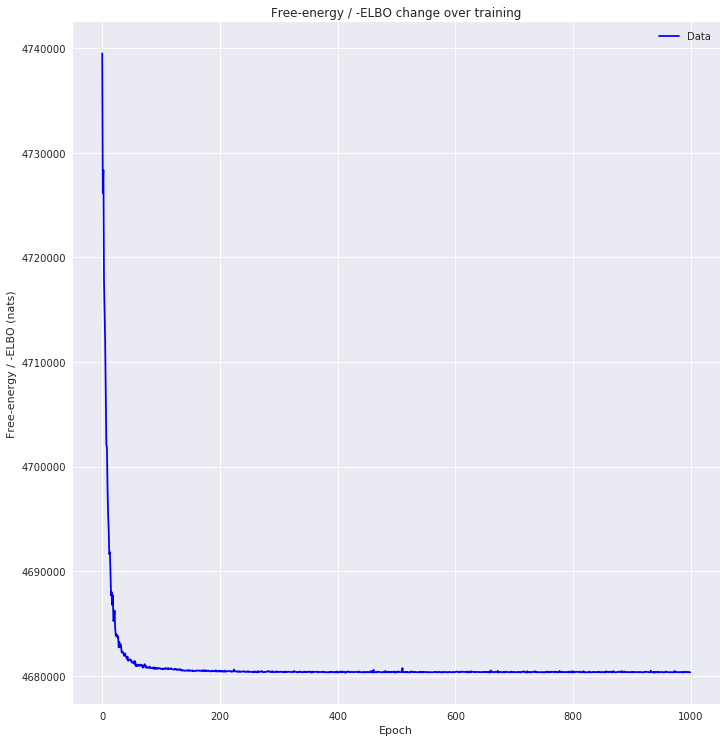

In [11]:
utils.plot_losses(losses)

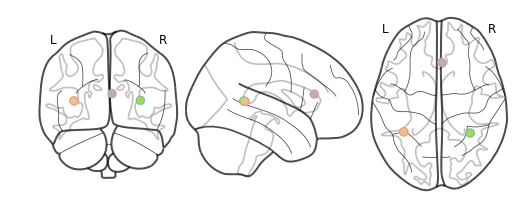

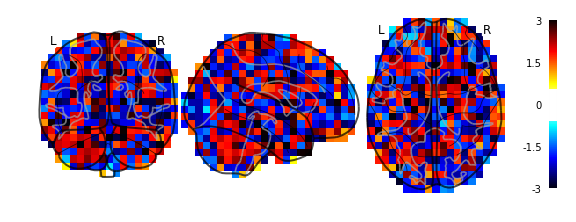

10/02/2019 17:38:54 Reconstruction Error (Frobenius Norm): 3.24342529e+02 out of 3.24435974e+02


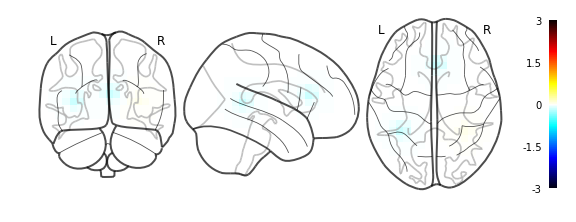

{'weights': tensor([[ 0.0721, -0.1695, -0.1669],
        [ 0.0623, -0.2065,  0.5034],
        [ 0.4288,  0.6322, -0.7826],
        [ 0.6255, -0.1653,  0.1604],
        [-0.3101, -0.2700,  0.7112],
        [ 0.2017,  0.1497, -0.1702],
        [ 0.0463, -0.1120,  0.0531],
        [-0.1577,  0.1788,  0.1361],
        [ 0.2799, -0.3929, -0.4904],
        [-0.3851, -0.2704,  0.3297],
        [ 0.0177, -0.6315,  0.5006],
        [-0.0853, -0.0617, -0.2534],
        [-0.4319,  0.1683,  0.0379],
        [-0.0700, -0.2757, -0.0724],
        [ 0.3100, -0.0346,  0.1332],
        [ 0.2234, -0.0175, -0.2666],
        [-0.0979,  0.1775, -0.0994],
        [ 0.2576, -0.0996,  0.7299],
        [ 0.0672,  0.1159, -0.8836],
        [ 0.1564, -0.1552,  0.1591]]), 'factors': tensor([[6.7039e-13, 4.3334e-11, 5.9983e-10,  ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 1.2699e-22, 7.3778e-23,
         9.3145e-24],
        [0.0000e+00, 0.0000e+00, 0.0000e+

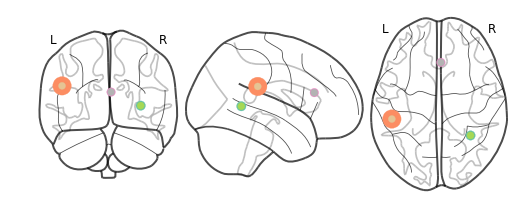

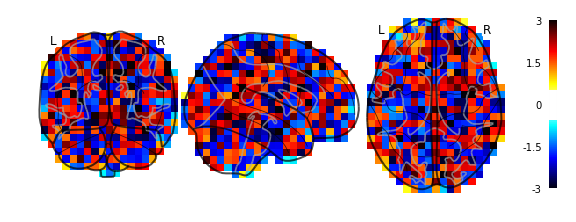

10/02/2019 17:38:57 Reconstruction Error (Frobenius Norm): 3.18195343e+02 out of 3.19607452e+02


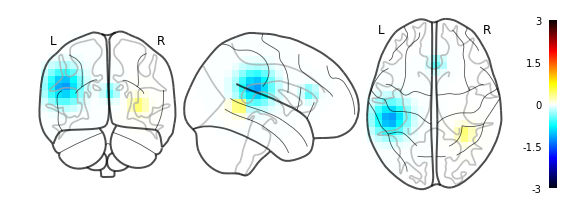

{'weights': tensor([[ 0.5506, -1.2282, -0.5084],
        [-0.1898, -1.4886, -0.0273],
        [-0.1718, -1.3133, -0.4265],
        [-0.2784, -1.3100,  0.1182],
        [ 0.5257, -1.2984, -0.2740],
        [ 0.0580, -1.2697,  0.0682],
        [ 0.0211, -1.3395,  0.0620],
        [ 0.5179, -1.3083, -0.5005],
        [ 0.0756, -1.4212, -0.4465],
        [-0.3572, -1.3205,  0.2921],
        [ 0.4423, -1.4231,  0.3476],
        [-0.0508, -1.3101,  0.1406],
        [ 0.1210, -1.2754,  0.1660],
        [ 0.4598, -1.3064,  0.0897],
        [-0.2161, -1.2875, -0.1631],
        [-0.4039, -1.2803,  0.0580],
        [ 0.0250, -1.2482,  0.1546],
        [ 0.5602, -1.3230,  0.0905],
        [-0.5974, -1.2400,  0.0050],
        [-0.4674, -1.2908, -0.0560]]), 'factors': tensor([[1.5256e-10, 2.7307e-09, 1.1661e-08,  ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00],
        [1.2239e-22, 6.9170e-22, 2.6856e-21,  ..., 6.4965e-04, 1.1906e-03,
         1.4992e-03],
        [0.0000e+00, 0.0000e+00, 0.0000e+

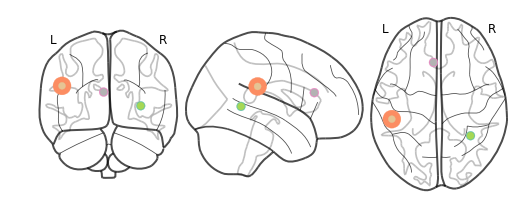

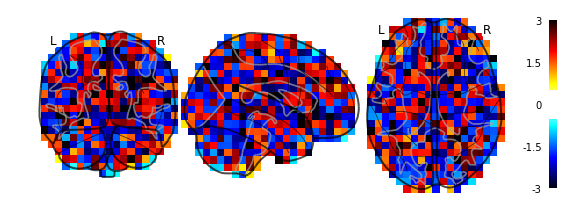

10/02/2019 17:39:00 Reconstruction Error (Frobenius Norm): 3.17564484e+02 out of 3.18838593e+02


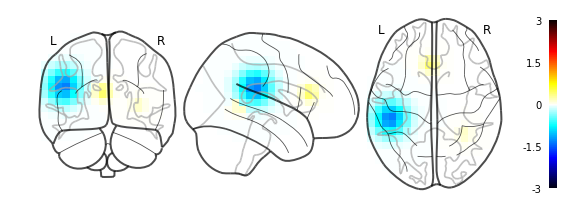

{'weights': tensor([[ 0.2170, -1.3731,  0.4815],
        [ 0.2242, -1.1270, -0.0057],
        [ 0.0704, -1.2407, -0.7221],
        [ 0.0279, -1.2306,  0.2836],
        [ 0.1724, -1.2432, -0.1871],
        [ 0.1467, -1.3065, -0.2776],
        [-0.2210, -1.3187,  0.2479],
        [-0.0043, -1.2367,  0.3827],
        [ 0.2066, -1.3330,  0.4025],
        [-0.1906, -1.3191,  0.0219],
        [ 0.1219, -1.2631,  0.5949],
        [-0.3564, -1.3328,  0.0435],
        [-0.3699, -1.2890, -0.3079],
        [-0.6635, -1.3388, -0.0238],
        [ 0.2241, -1.3220, -0.3410],
        [ 0.0654, -1.3095, -0.9022],
        [ 0.0616, -1.3743, -0.1214],
        [ 0.0758, -1.3281, -0.2054],
        [-0.2181, -1.3719,  0.8760],
        [ 0.2052, -1.2948,  0.1860]]), 'factors': tensor([[7.5105e-12, 1.9369e-10, 9.7703e-10,  ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00],
        [9.4691e-24, 5.8448e-23, 2.4320e-22,  ..., 4.3373e-04, 8.2007e-04,
         1.0452e-03],
        [0.0000e+00, 0.0000e+00, 0.0000e+

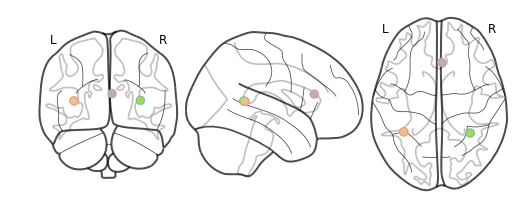

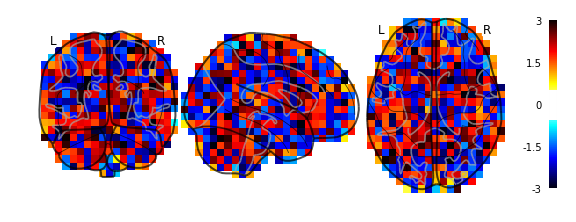

10/02/2019 17:39:02 Reconstruction Error (Frobenius Norm): 3.24419952e+02 out of 3.24489990e+02


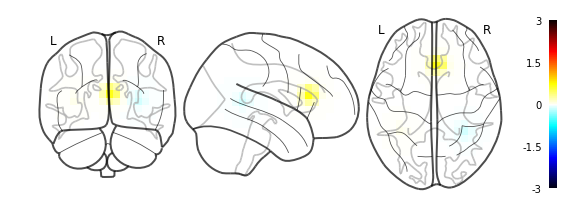

{'weights': tensor([[-0.1340,  0.0555,  0.7493],
        [-0.0795,  0.0040,  0.3157],
        [-0.1642, -0.3842,  0.4558],
        [-0.2195,  0.4827,  0.1619],
        [-0.0487,  0.1351,  0.1464],
        [ 0.1134, -0.3486,  0.3467],
        [ 0.1468, -0.0299, -0.2527],
        [ 0.6207, -0.3074, -0.3357],
        [-0.1858,  0.3834,  0.1289],
        [-0.1105, -0.3345, -0.1615],
        [-0.1784,  0.0172, -0.0398],
        [ 0.2032, -0.2732,  0.3723],
        [ 0.1087,  0.6107,  0.2001],
        [ 0.0283,  0.2091, -0.1573],
        [ 0.3450,  0.2791, -0.3275],
        [ 0.4219,  0.4127,  0.0133],
        [ 0.1512,  0.0317,  0.1166],
        [-0.1110, -0.2666, -0.5022],
        [ 0.2745,  0.2269, -0.2276],
        [-0.1651, -0.0793,  0.0345]]), 'factors': tensor([[6.7039e-13, 4.3334e-11, 5.9983e-10,  ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 1.2699e-22, 7.3778e-23,
         9.3145e-24],
        [0.0000e+00, 0.0000e+00, 0.0000e+

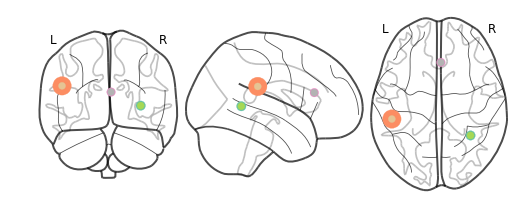

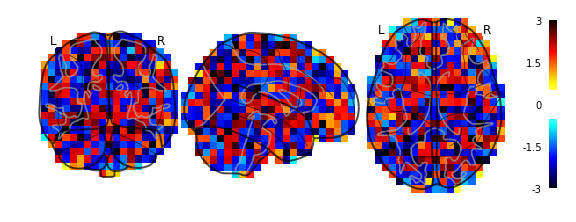

10/02/2019 17:39:05 Reconstruction Error (Frobenius Norm): 3.18576447e+02 out of 3.18721466e+02


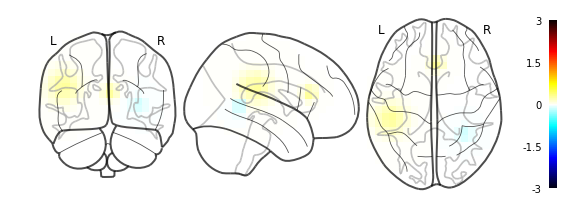

{'weights': tensor([[-0.1571,  0.3007,  0.3251],
        [-0.0673,  0.3561,  0.4788],
        [ 0.2253,  0.3326,  0.0487],
        [-0.1422,  0.2703, -0.0075],
        [ 0.3804,  0.3224, -0.0461],
        [-0.2996,  0.3281, -0.2173],
        [-0.2073,  0.3534, -0.5315],
        [ 0.2210,  0.4463,  0.2967],
        [-0.7987,  0.3599,  0.0138],
        [-0.6107,  0.4124, -0.2529],
        [ 0.3275,  0.2698,  0.0034],
        [-0.4230,  0.2541,  0.0354],
        [ 0.0856,  0.5031, -0.0462],
        [-0.1195,  0.3945,  0.6558],
        [ 0.2776,  0.3461, -0.0267],
        [ 0.4253,  0.2774, -0.0558],
        [ 0.2741,  0.3523, -0.3083],
        [-0.2716,  0.3065,  0.0070],
        [-0.1941,  0.2460, -0.2563],
        [ 0.3775,  0.3643,  0.1935]]), 'factors': tensor([[1.5256e-10, 2.7307e-09, 1.1661e-08,  ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00],
        [1.2239e-22, 6.9170e-22, 2.6856e-21,  ..., 6.4965e-04, 1.1906e-03,
         1.4992e-03],
        [0.0000e+00, 0.0000e+00, 0.0000e+

In [12]:
for b in np.random.choice(range(dtfa.num_blocks), 5):
    dtfa.plot_factor_centers(b)
    dtfa.plot_original_brain(b)
    dtfa.plot_reconstruction(b)
    print(dtfa.results(b))

In [16]:
def task_rest_labeler(task):
    if 'rest' in str(task):
        return 'Rest'
    else:
        return 'Task %s' % task

/home/eli/anaconda3/envs/HTFATorch/lib/python3.6/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


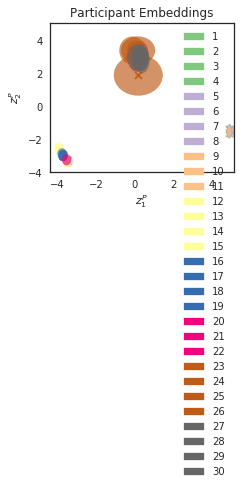

In [15]:
dtfa.scatter_subject_embedding(labeler=lambda subject: subject)

/home/eli/anaconda3/envs/HTFATorch/lib/python3.6/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


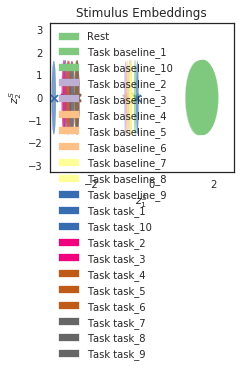

In [17]:
dtfa.scatter_task_embedding(labeler=task_rest_labeler)

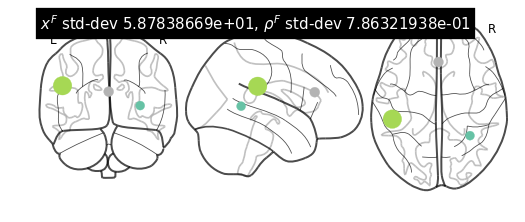

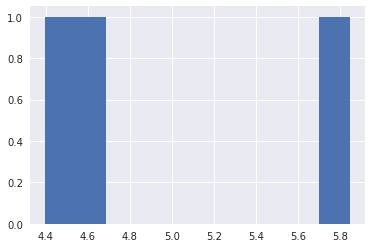

(<nilearn.plotting.displays.OrthoProjector at 0x7fe29871ceb8>,
 tensor([[ 33.5273, -49.4690,   4.1601],
         [-48.1737, -32.0671,  25.0660],
         [  0.3699,  27.9940,  18.8576]]),
 tensor([4.3984, 5.8475, 4.5938]))

In [18]:
dtfa.visualize_factor_embedding()

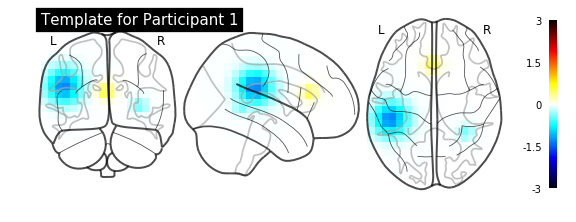

In [19]:
dtfa.plot_subject_template(1)

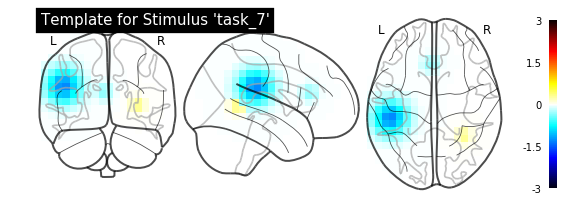

In [20]:
dtfa.plot_task_template('task_7')

In [24]:
def group_labeler(subject):
    if subject <= 10:
        return 'Group 1'
    elif subject <= 20:
        return 'Group 2'
    else:
        return 'Group 3'

/home/eli/anaconda3/envs/HTFATorch/lib/python3.6/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


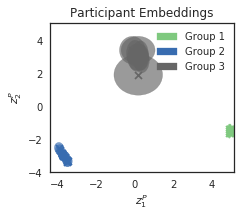

In [25]:
dtfa.scatter_subject_embedding(labeler=group_labeler)

In [26]:
dtfa.average_reconstruction_error(weighted=False)

10/02/2019 18:01:28 Average reconstruction error (MSE): 3.19312584e+02 +/- 1.55627569e+00
10/02/2019 18:01:28 Average data norm (Euclidean): 3.20555643e+02 +/- 2.01751855e+00
10/02/2019 18:01:28 Percent average reconstruction error: 99.614317 +/- 5.09321766e-01


(array([318.5012207 , 317.18945312, 319.32272339, ..., 318.72607422,
        319.2729187 , 319.13272095]),
 array([319.70812988, 318.53671265, 320.64831543, ..., 323.17349243,
        323.63345337, 323.11935425]),
 array([0.99622497, 0.99577047, 0.9958659 , ..., 0.9862383 , 0.98652632,
        0.98766204]))

In [27]:
dtfa.free_energy(num_particles=1, batch_size=300, use_cuda=True, blocks_batch_size=20,
                 blocks_filter=synthetic_db.inference_filter(training=False))

[[4680361.0, -4679507.0, 853.6388549804688],
 [4680432.0, -4679473.5, 906.0570678710938]]